# Project: TMDb Movie Complete Data Analysis

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

> Looking at the well-put dataset of movies, I decided to take a simple approach in finding the perfect candidates for each aspect in the world of cinematography; possibly putting together the most successful team for a film the world isn't ready for yet.

> The Movie dataset contained some very valuable information but those that were put into true effect were the 'cast','director','popularity','vote_average','revenue' and of course 'original_title'

> I hope you are entertained by my attempts in finding the most interesting conclusions that can be found throughout the dataset where I document my though process thoroughly.

In [37]:
import numpy as np
import pandas as pd
%matplotlib inline

<a id='wrangling'></a>
# Data Wrangling

### Loading Data and General Inspection

In [38]:
# Starting with loading data as variable 'df'
df = pd.read_csv('tmdb-movies.csv')

# Inspecting the data
df.info()
df.head(2)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    10866 non-null  int64  
 1   imdb_id               10856 non-null  object 
 2   popularity            10866 non-null  float64
 3   budget                10866 non-null  int64  
 4   revenue               10866 non-null  int64  
 5   original_title        10866 non-null  object 
 6   cast                  10790 non-null  object 
 7   homepage              2936 non-null   object 
 8   director              10822 non-null  object 
 9   tagline               8042 non-null   object 
 10  keywords              9373 non-null   object 
 11  overview              10862 non-null  object 
 12  runtime               10866 non-null  int64  
 13  genres                10843 non-null  object 
 14  production_companies  9836 non-null   object 
 15  release_date       

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08


In [39]:
# Data set contains 10,866 movies
df.shape

(10866, 21)

### Identifying Problems

##### Problem 1 : NaN Values

In [40]:
# Checking for NaN Values
df.isna().sum()

id                         0
imdb_id                   10
popularity                 0
budget                     0
revenue                    0
original_title             0
cast                      76
homepage                7930
director                  44
tagline                 2824
keywords                1493
overview                   4
runtime                    0
genres                    23
production_companies    1030
release_date               0
vote_count                 0
vote_average               0
release_year               0
budget_adj                 0
revenue_adj                0
dtype: int64

In [41]:
# Looking at examples of each column to decide actions upon NaN Values in each one

nan_df = df[['imdb_id', 'cast', 'homepage', 'director', 'tagline', 'keywords', 'overview','genres','production_companies']]
nan_df.head(1)

,imdb_id,cast,homepage,director,tagline,keywords,overview,genres,production_companies
0,tt0369610,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,monster|dna|tyrannosaurus rex|velociraptor|island,Twenty-two years after the events of Jurassic ...,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...


**Data Cleaning Instructions:**

- **imdb_id:** Drop NaN values.
- **cast:** Drop NaN values.
- **homepage:** Replace NaN values with "None".
- **director:** Drop NaN values.
- **tagline:** Replace NaN values with "None".
- **keywords:** Replace NaN values with "None".
- **overview:** Replace NaN values with "None".
- **genres:** Drop NaN values.
- **production_companies:** Replace NaN values with "Not Mentioned". <br><br>

---

##### Problem 2: String Split Absence

In [42]:
# Both categories need a string split for the console to understand each genre/actor
# inside each movie as an individual value.

split_df = df[['genres', 'cast']]
split_df.head(1)

,genres,cast
0,Action|Adventure|Science Fiction|Thriller,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...


---

##### Problem 3: Useless Data

In [43]:
# Both 'id' and 'imdb_id' are irrelevant to Data Analysis
# as primary keys wouldn't show any significant conclusions
# thus should be removed

key_df = df[['id','imdb_id']]
key_df.head(1)

,id,imdb_id
0,135397,tt0369610


##### Problem 4: Unrealistic Runtime

In [44]:
# 'runtime' column contains values ranging till 900 minutes
# (equivalent to 15 whole hours!)

df.sort_values(by='runtime', ascending=False)['runtime'].head(10)
# any values values above 300 should be dropped

3894    900
4041    877
2722    705
6176    566
6181    561
6894    550
2214    540
3356    501
1865    500
3141    470
Name: runtime, dtype: int64

---

### Cleaning Data

##### Problem 1: NaN Values  ~ *Solution* 



In [45]:
df.dropna(subset=['imdb_id', 'cast', 'director','genres'], inplace=True)

In [46]:
df[['homepage', 'tagline', 'keywords', 'overview']] = df[['homepage', 'tagline', 'keywords','overview']].fillna('None')
df['production_companies'] = df['production_companies'].fillna('Not Mentioned')

In [47]:
# Validity Check
df.isna().sum()

id                      0
imdb_id                 0
popularity              0
budget                  0
revenue                 0
original_title          0
cast                    0
homepage                0
director                0
tagline                 0
keywords                0
overview                0
runtime                 0
genres                  0
production_companies    0
release_date            0
vote_count              0
vote_average            0
release_year            0
budget_adj              0
revenue_adj             0
dtype: int64

---

##### Problem 2: String Split ~ *Solution*

In [48]:
df['genres'] = df['genres'].str.split('|')
df['cast'] = df['cast'].str.split('|')

In [49]:
# Validity Check
df[['genres','cast']].head()

,genres,cast
0,"[Action, Adventure, Science Fiction, Thriller]","[Chris Pratt, Bryce Dallas Howard, Irrfan Khan..."
1,"[Action, Adventure, Science Fiction, Thriller]","[Tom Hardy, Charlize Theron, Hugh Keays-Byrne,..."
2,"[Adventure, Science Fiction, Thriller]","[Shailene Woodley, Theo James, Kate Winslet, A..."
3,"[Action, Adventure, Science Fiction, Fantasy]","[Harrison Ford, Mark Hamill, Carrie Fisher, Ad..."
4,"[Action, Crime, Thriller]","[Vin Diesel, Paul Walker, Jason Statham, Miche..."


---

##### Problem 3: Useless Data ~ *Solution*

In [50]:
df.drop(['id', 'imdb_id'], axis=1, inplace=True)
df.reset_index(drop=True)


,popularity,budget,revenue,original_title,cast,homepage,director,tagline,keywords,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,32.985763,150000000,1513528810,Jurassic World,"[Chris Pratt, Bryce Dallas Howard, Irrfan Khan...",http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,monster|dna|tyrannosaurus rex|velociraptor|island,Twenty-two years after the events of Jurassic ...,124,"[Action, Adventure, Science Fiction, Thriller]",Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,28.419936,150000000,378436354,Mad Max: Fury Road,"[Tom Hardy, Charlize Theron, Hugh Keays-Byrne,...",http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,future|chase|post-apocalyptic|dystopia|australia,An apocalyptic story set in the furthest reach...,120,"[Action, Adventure, Science Fiction, Thriller]",Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,13.112507,110000000,295238201,Insurgent,"[Shailene Woodley, Theo James, Kate Winslet, A...",http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,based on novel|revolution|dystopia|sequel|dyst...,Beatrice Prior must confront her inner demons ...,119,"[Adventure, Science Fiction, Thriller]",Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,11.173104,200000000,2068178225,Star Wars: The Force Awakens,"[Harrison Ford, Mark Hamill, Carrie Fisher, Ad...",http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,android|spaceship|jedi|space opera|3d,Thirty years after defeating the Galactic Empi...,136,"[Action, Adventure, Science Fiction, Fantasy]",Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,9.335014,190000000,1506249360,Furious 7,"[Vin Diesel, Paul Walker, Jason Statham, Miche...",http://www.furious7.com/,James Wan,Vengeance Hits Home,car race|speed|revenge|suspense|car,Deckard Shaw seeks revenge against Dominic Tor...,137,"[Action, Crime, Thriller]",Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10722,0.080598,0,0,The Endless Summer,"[Michael Hynson, Robert August, Lord 'Tally Ho...",None,Bruce Brown,None,surfer|surfboard|surfing,"The Endless Summer, by Bruce Brown, is one of ...",95,[Documentary],Bruce Brown Films,6/15/66,11,7.4,1966,0.000000e+00,0.000000e+00
10723,0.065543,0,0,Grand Prix,"[James Garner, Eva Marie Saint, Yves Montand, ...",None,John Frankenheimer,Cinerama sweeps YOU into a drama of speed and ...,car race|racing|formula 1,Grand Prix driver Pete Aron is fired by his te...,176,"[Action, Adventure, Drama]",Cherokee Productions|Joel Productions|Douglas ...,12/21/66,20,5.7,1966,0.000000e+00,0.000000e+00
10724,0.065141,0,0,Beregis Avtomobilya,"[Innokentiy Smoktunovskiy, Oleg Efremov, Georg...",None,Eldar Ryazanov,None,car|trolley|stealing car,An insurance agent who moonlights as a carthie...,94,"[Mystery, Comedy]",Mosfilm,1/1/66,11,6.5,1966,0.000000e+00,0.000000e+00
10725,0.064317,0,0,"What's Up, Tiger Lily?","[Tatsuya Mihashi, Akiko Wakabayashi, Mie Hama,...",None,Woody Allen,WOODY ALLEN STRIKES BACK!,spoof,"In comic Woody Allen's film debut, he took the...",80,"[Action, Comedy]",Benedict Pictures Corp.,11/2/66,22,5.4,1966,0.000000e+00,0.000000e+00


In [51]:
# Validity Check
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10727 entries, 0 to 10865
Data columns (total 19 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   popularity            10727 non-null  float64
 1   budget                10727 non-null  int64  
 2   revenue               10727 non-null  int64  
 3   original_title        10727 non-null  object 
 4   cast                  10727 non-null  object 
 5   homepage              10727 non-null  object 
 6   director              10727 non-null  object 
 7   tagline               10727 non-null  object 
 8   keywords              10727 non-null  object 
 9   overview              10727 non-null  object 
 10  runtime               10727 non-null  int64  
 11  genres                10727 non-null  object 
 12  production_companies  10727 non-null  object 
 13  release_date          10727 non-null  object 
 14  vote_count            10727 non-null  int64  
 15  vote_average          10

---

##### Problem 4: Unrealistic Runtime ~ *Solution*

In [52]:
# dropping films with a value of more than
# 300 minutes
df.drop(df[df['runtime'] >= 300].index, inplace = True)
df.reset_index(inplace=True)



In [53]:
# Validity Check
df.sort_values(by='runtime', ascending=False)['runtime'].head(10)

7138     294
8625     292
1213     285
1164     282
4217     273
5225     273
7477     270
6704     270
2570     257
10149    254
Name: runtime, dtype: int64

<a id='eda'></a>
## Exploratory Data Analysis

> Data has finally been cleaned, now it's time to answer all the that certainly fuel my curiosity!



In [54]:
# to avoid any future repetitions
# I will create a function to sort any column into 
# a Series in descending order
def sorting(df, column):
    df_copy = df.sort_values(by=column, ascending=False).head(10)
    return df_copy 

# also creating one for the bar chart
def bar_chart(function_df, x, y, title, xlabel,ylabel):
    function_df.plot(kind='bar', x=x,y=y,title=title,xlabel=xlabel,ylabel=ylabel);

## Question 1: What is the **most used genre?** 

In [55]:
# Each element inside 'genres' list cannot be
# seen individually so finding out value of
# each specific genre appears impossible
# under these circumstances
df['genres'].value_counts()

genres
[Drama]                                         709
[Comedy]                                        707
[Drama, Romance]                                289
[Comedy, Drama]                                 280
[Documentary]                                   268
                                               ... 
[Family, Adventure, Animation, Comedy]            1
[Drama, History, Crime]                           1
[Science Fiction, Horror, Action, Thriller]       1
[Action, Thriller, Science Fiction, Mystery]      1
[Mystery, Science Fiction, Thriller, Drama]       1
Name: count, Length: 2016, dtype: int64

In [56]:
# Making a new series containing each
# genre as an individual element
dissected_genres = df['genres'].explode()
# Repitition of each genre can now be
# seen clearly
dissected_genres.value_counts()

genres
Drama              4731
Comedy             3774
Thriller           2902
Action             2370
Romance            1705
Horror             1635
Adventure          1459
Crime              1352
Science Fiction    1217
Family             1212
Fantasy             902
Mystery             807
Animation           662
Documentary         463
Music               399
History             323
War                 265
Foreign             184
Western             163
TV Movie            162
Name: count, dtype: int64

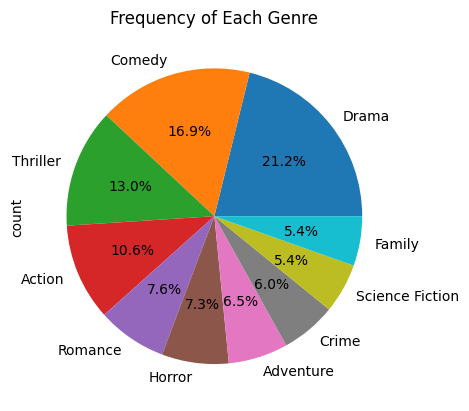

In [57]:
# now to make a pie chart representing data
dissected_genres.value_counts().head(10).plot(kind="pie", title="Frequency of Each Genre", autopct='%1.1f%%');

>Conclusion: Most used genre is Drama with *4745* movies.

#### Bonus Question: What is the **most trending genre in 2015?** (most recent year)

In [58]:
# Setting variable sorting data frame based on
# 'release-year' in descending order
year_sorted = df.sort_values(by='release_year', ascending=False).reset_index()
# data frame contains all years not
# exclusively 2015

In [59]:
# To fix that we need first
# find the index of the last row in the year 2015
year_sorted[year_sorted['release_year'] > 2014]['release_year'].tail(1)


615    2015
Name: release_year, dtype: int64

In [60]:
# Making 'year_sorted' to movies in 2015
# exclusively
year_sorted = year_sorted.head(617)

# dissect genres inside 'year_sorted'
dissected_year_sorted = year_sorted['genres'].explode()

genres
Drama    259
Name: count, dtype: int64

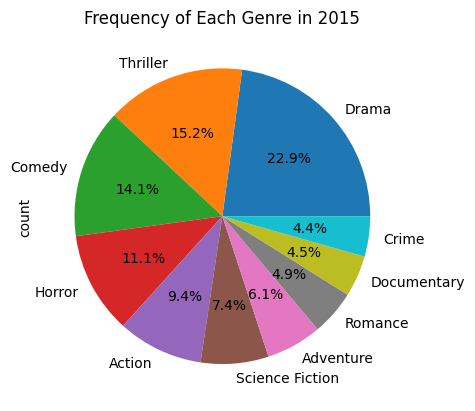

In [61]:
# display on pie chart!
dissected_year_sorted.value_counts().head(10).plot(kind="pie", autopct='%1.1f%%', title="Frequency of Each Genre in 2015");
dissected_year_sorted.value_counts().head(1)

>Conclusion: Drama is once again the most trending genre with 260 movies in just 2015!

## Question 2: Which **actor** played in the **most movies?**

cast
Robert De Niro    72
Name: count, dtype: int64

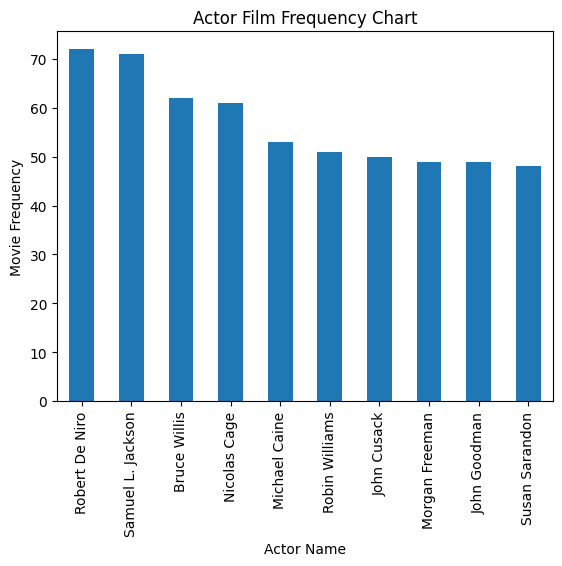

In [62]:
# Creating a Series with each cast member
# in the list as an idnvidual
# value
dissected_cast = df['cast'].explode()

# Displaying Number of movies played
# by each actor in a bar chart
dissected_cast.value_counts().head(10).plot(kind='bar', title="Actor Film Frequency Chart", xlabel="Actor Name", ylabel="Movie Frequency");
dissected_cast.value_counts().head(1)

> Conclusion: Robert De Niro played in the most films, starring in *72* Movies!

### Bonus Question: Which director made the most movies? 

director
Woody Allen    45
Name: count, dtype: int64

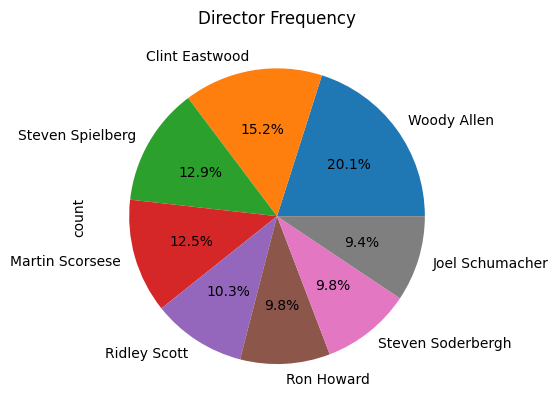

In [63]:
df['director'].value_counts().head(8).plot(kind='pie', title='Director Frequency', autopct='%1.1f%%');
df['director'].value_counts().head(1)

> Conclusion: Woody Allen made the most movies (45 movies)

## Question 3: What is the **most successful film?**

,original_title,revenue
1354,Avatar,2781505847


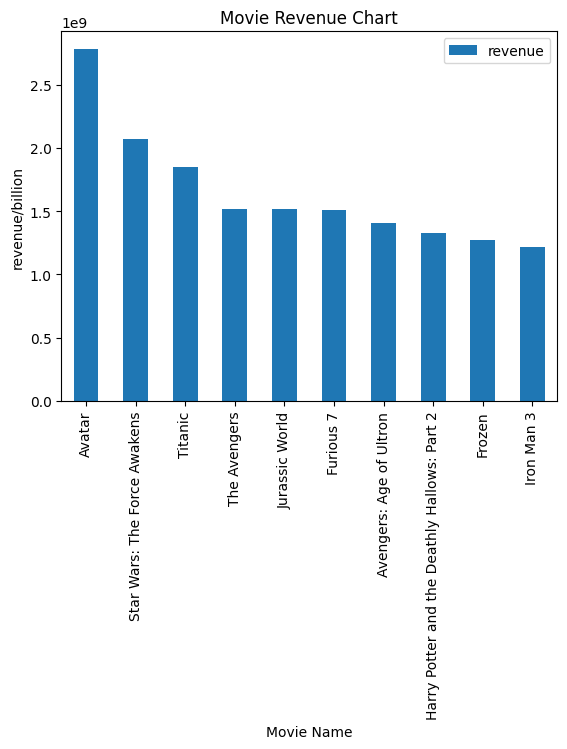

In [64]:
# Making a list sorted by Highest to Lowest revenue
# by 'sorting()' fun
revenue_df = sorting(df,'revenue')
# Creating Bar Chart for it
bar_chart(revenue_df, 'original_title','revenue','Movie Revenue Chart', 'Movie Name', 'revenue/billion')
# Seeing the exact number of the revenue of the #1 ranked film
df[df['original_title'] == revenue_df['original_title'].iloc[0]][['original_title', 'revenue']]

This is done to check the most promising films in each aspect!

1180    8.8
6784    8.7
3613    8.5
8270    8.5
8695    8.5
Name: vote_average, dtype: float64

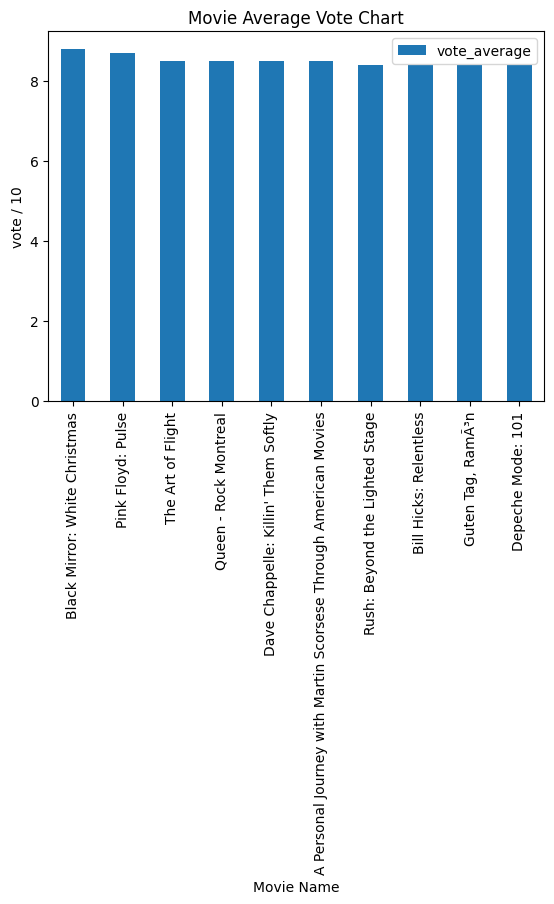

In [65]:
# Same process with the vote average
# making a list sorted by Highest to Lowest in vote average
# using sorting()
# in a Series
sorted_vote = sorting(df, 'vote_average')
bar_chart(sorted_vote,'original_title','vote_average','Movie Average Vote Chart','Movie Name', 'vote / 10')
sorted_vote['vote_average'].head(5)

Unfortunately no repeated films in both revenue and average vote

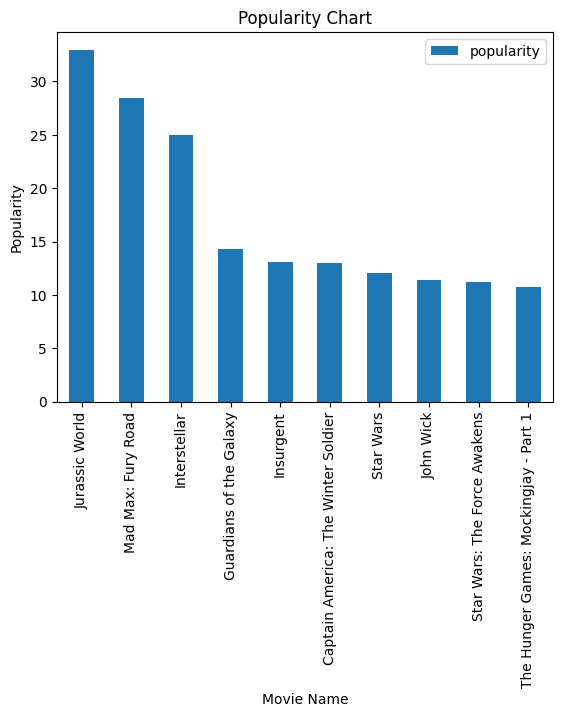

In [66]:
# Once again utilizing 'sorting()' function
# to sort popularity from Highest to Lowest
popularity_df = sorting(df,'popularity')
bar_chart(popularity_df,'original_title', 'popularity', 'Popularity Chart', 'Movie Name', 'Popularity')

Jurassic world appears in both revenue and popularity deeming it the film with the highest states based on these 3 aspects!

In [67]:
# Checking how successful Jurassic World is in the 3rd aspect
df[df['original_title'] == 'Jurassic World']['vote_average']

0    6.5
Name: vote_average, dtype: float64

> Conclusion: **Jurassic World** takes the cake for the most successful film, while it does lack in the average vote with a number of 6.5/10, it makes up for it in popularity where it ranks #1 and in revenue where it ranks #5, these statistics do certainly make it a promising contender!

## Question 4: Is there any **correlation between movie length and revenue**?  

0        124
1        120
2        119
3        136
4        137
        ... 
10700     95
10701    176
10702     94
10703     80
10704     74
Name: runtime, Length: 10705, dtype: int64

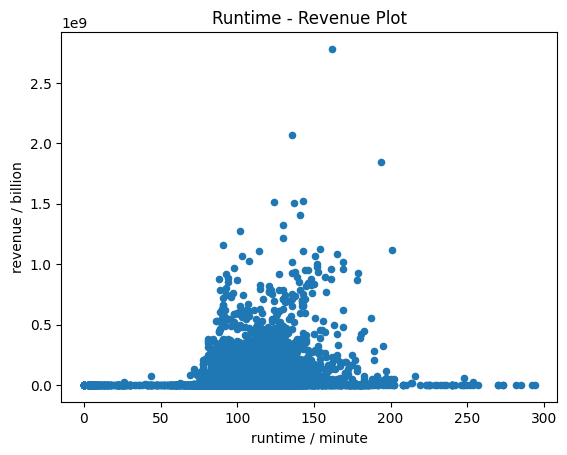

In [68]:
# Making a scatter plot to reperesent the correlation
# between 'revenue' and 'runtime'
df.plot.scatter(x='runtime',y='revenue', title='Runtime - Revenue Plot', xlabel='runtime / minute', ylabel='revenue / billion')
df['runtime']


> Conclusion: The movies with the highest revenues are generally situated between **70-180 minutes** long

<a id='conclusions'></a>
## Conclusions & Limitations

> **Conclusion 1**: To answer the question of "What is the most used genre?": <br><br>
The repitition of each genre across each individual movie was counted to find out that the most used genre is "Drama" with 4745 Movies! Which also takes 1st place in the most trending genre in 2015! 
<br><br>
Additional research can be done by doing a deep dive into the *most viewed genres over the years*.
<br>
Unfortunately, data cannot be completely accurate since there's 8 years worth of missing data from 2016-2024 which could have very well altered the outcome of the results

<br>

> **Conclusion 2**: To answer the question of "Which actor played in the most movies?": <br><br> the repition of each actor in the cast of each movie was counted individually across each movie to conclude that the actor who surely made the biggest influence was 'Robert Deniro' starring in 72 movies! As an honorary mention, the same process was done to count how many movies were directed by each director to conclude that Woody Allen made the most movies with a total number of 45!  <br><br>
Additional research can be done by doing a deep dive into *most frequent starring actors in disney and netflix series*.<br>
Unfortunately, data cannot be completely accurate since background characters were not listed which could have altered the outcome of the results

<br>

> **Conclusion 3**: Answering the question of "What is the most successful film" was no easy task as the 3 aspects: popularity, vote average, revenue.<br><br>All were all put into consideration comparing the top 10 of each film the most impressive candidate was "Jurassic World" scoring the Top #1 in popularity and #5 in revenue with the average vote unfortunately ruining its golden streak by landing a 6.5/10!<br><br> 
Additional research can be done by doing a deep dive into *timeless films that will be remembered for generations (according to surveys)*<br>
Unfortunately, data cannot be completely accurate as there was no mention of the rate decline/incline of popularity in 2024 so data could not be relevant. 

<br> 

> **Conclusion 4**: Trying to find the correlation between runtime and revenue was a task where making a scatter plot truly shines the most.<br><br> From looking at the graph carefully the most ideal length for a movie is **70-180** minutes long!
<br><br>
Additional research can be done by doing a deep dive into *movie length trends throughout the ages* <br>
Unfortunately, data cannot be completely accurate as there are some outliers and exceptions in graph

## Thank you for your time :)